In [136]:
import parselmouth
import textgrids

import numpy as np
import matplotlib.pyplot as plt

In [137]:
plt.rcParams["font.sans-serif"] = ["STFangsong"]
plt.rcParams['figure.dpi'] = 150

In [138]:
snd = parselmouth.Sound("Tone1.wav")
grid = textgrids.TextGrid("Tone1.TextGrid")

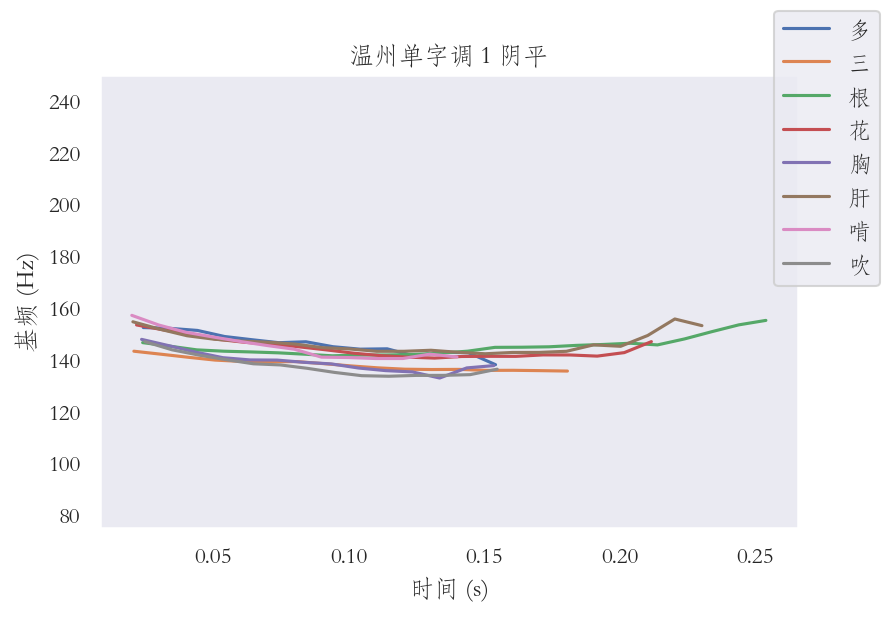

In [141]:
plt.figure()
plt.title("温州单字调 1 阴平")
plt.xlabel("时间 (s)")
plt.ylabel("基频 (Hz)")
plt.grid(False)
plt.ylim(75, 250)
for token in grid['tokens']:
    text = token.text.transcode()
    if not text or text.isspace():
        continue
    selected_snd = snd.extract_part(token.xmin, token.xmax)
    pitch = selected_snd.to_pitch()
    ys = pitch.selected_array['frequency']
    ys[ys==0] = np.nan
    plt.plot(pitch.xs(), ys, label=text)
plt.figlegend()
plt.show()